# Ratings EDA

- 수행 이유
    - 시각화 익숙해지기
    - 전체적인 데이터의 특징 알아보기
- 수행 방법
    - seaborn 
- 결론
    - 특이한 인사이트는 발견하지 않았지만, 시각화 툴에 익숙해지는 계기
    - 여러 csv 파일을 합쳐서 분석하는 방법에 익숙해짐

## 0. 데이터 불러오기

In [68]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
base_path = os.path.join(os.curdir, 'data')
user_path = os.path.join(base_path, 'users_v2.csv') # original 데이터가 아님
book_path = os.path.join(base_path, 'books_v3.csv') # original 데이터가 아님
rating_path1 = os.path.join(base_path, 'train_ratings.csv')
rating_path2 = os.path.join(base_path, 'test_ratings.csv')

In [70]:
users = pd.read_csv(user_path, encoding='utf-8')
books = pd.read_csv(book_path, encoding='utf-8')
ratings = pd.read_csv(rating_path1, encoding='utf-8')
# test_ratings = pd.read_csv(rating_path2, encoding='utf-8')
# ratings = pd.concat([train_ratings, test_ratings])

In [71]:
ratings.head()

,user_id,isbn,rating
0,8,0002005018,4
1,67544,0002005018,7
2,123629,0002005018,8
3,200273,0002005018,8
4,210926,0002005018,9


In [72]:
print(ratings['user_id'].nunique()) # user 수
print(ratings.shape)

59803
(306795, 3)


In [73]:
ratings['rating'].value_counts(True) # train 데이터만 

8     0.239877
7     0.172519
9     0.158650
10    0.139422
6     0.082501
5     0.045995
1     0.043185
2     0.042142
4     0.041419
3     0.034290
Name: rating, dtype: float64

## 1. 시각화

In [74]:
users['age_range'] = users['age']//10*10
users.head()

,user_id,location,age,age_range
0,8,"timmins,ontario,canada",32.0,30.0
1,11400,"ottawa,ontario,canada",49.0,40.0
2,11676,",,",28.0,20.0
3,67544,"toronto,ontario,canada",30.0,30.0
4,85526,"victoria,britishcolumbia,canada",36.0,30.0


In [75]:
ratings.groupby('user_id')['rating'].count().sort_values(ascending=False)

user_id
11676     5520
98391     4560
189835    1503
153662    1496
23902      956
          ... 
47317        1
150670       1
150676       1
150677       1
138957       1
Name: rating, Length: 59803, dtype: int64

In [76]:
# 책을 많이 읽은 유저 20명의 통계 확인 
heavy_users_list = ratings.groupby('user_id')['rating'].count().sort_values(ascending=False).head(20).index
ratings[ratings['user_id'].isin(heavy_users_list)].groupby('user_id')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
user_id,,,,,,,,
11676,5520.0,6.779891,2.608527,1.0,6.0,7.0,9.0,10.0
16795,760.0,6.423684,2.367315,1.0,5.0,7.0,8.0,10.0
23902,956.0,7.174686,1.813223,1.0,6.0,7.0,8.0,10.0
35859,614.0,7.175896,2.119206,1.0,7.0,8.0,8.0,10.0
56399,673.0,9.312036,1.319763,2.0,9.0,10.0,10.0,10.0
76499,810.0,8.477778,2.717453,1.0,9.0,10.0,10.0,10.0
95359,488.0,7.200820,2.279414,1.0,6.0,8.0,9.0,10.0
98391,4560.0,8.566228,1.255477,2.0,8.0,9.0,9.0,10.0
101851,452.0,8.420354,1.670225,1.0,8.0,9.0,10.0,10.0


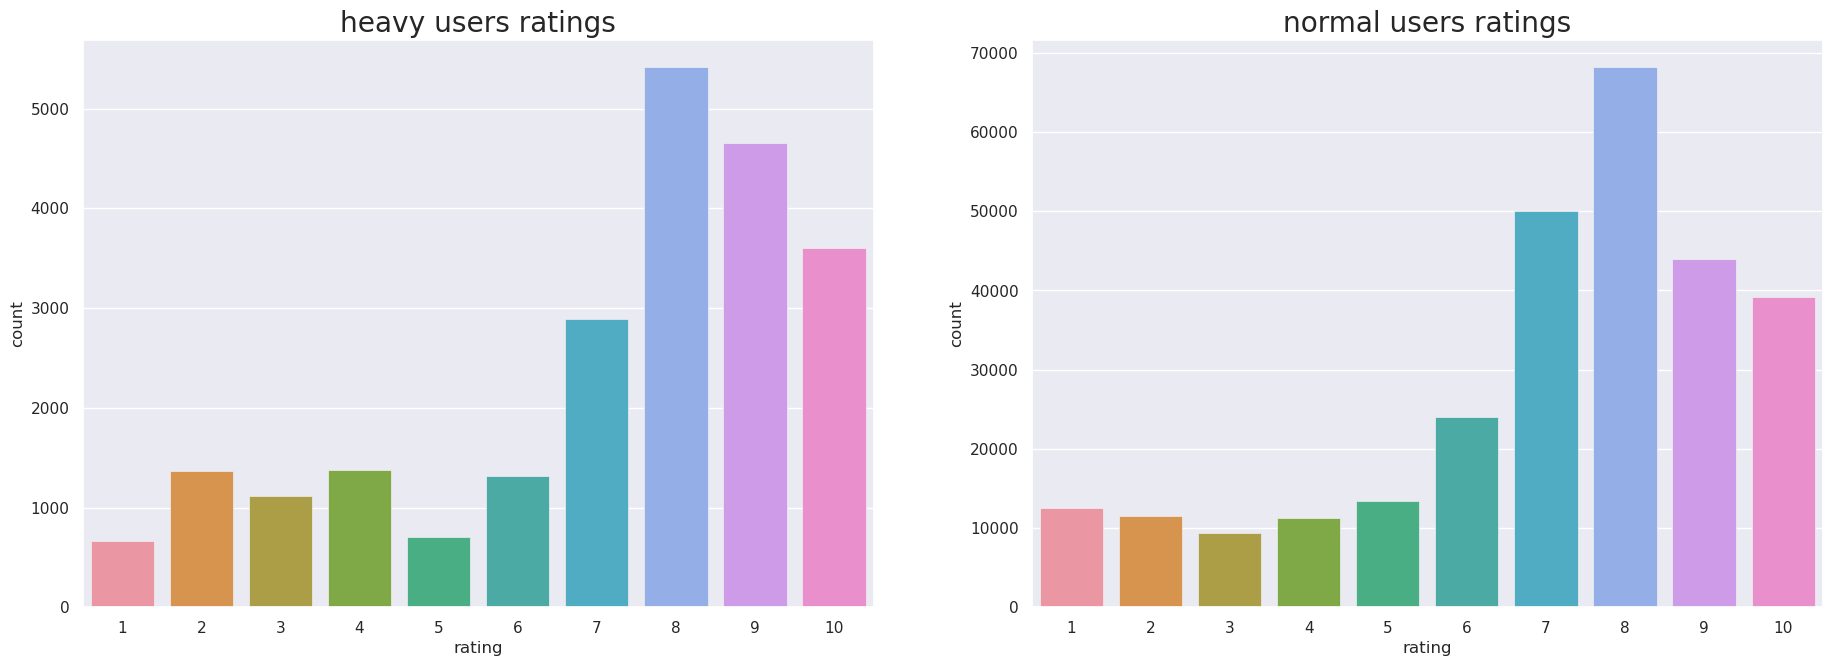

In [77]:
# y축 범위는 다르지만, 비율 파악
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
plt.style.use('fivethirtyeight')
sns.countplot(data=ratings[(ratings['user_id'].isin(heavy_users_list))], x='rating', ax=ax[0])
sns.countplot(data=ratings[~(ratings['user_id'].isin(heavy_users_list))] , x='rating', ax=ax[1])
ax[0].set_title("heavy users ratings")
ax[1].set_title("normal users ratings")
plt.show()

In [78]:
# isbn 별 많이 읽힌 책 -> Data merge 이후 title 및 정보확인 가능 
ratings.groupby('isbn')['rating'].count().sort_values(ascending=False)

isbn
0316666343    566
0971880107    465
0385504209    390
0312195516    307
0060928336    256
             ... 
0520060199      1
0520059808      1
0520058852      1
0520058763      1
B000234N3A      1
Name: rating, Length: 129777, dtype: int64

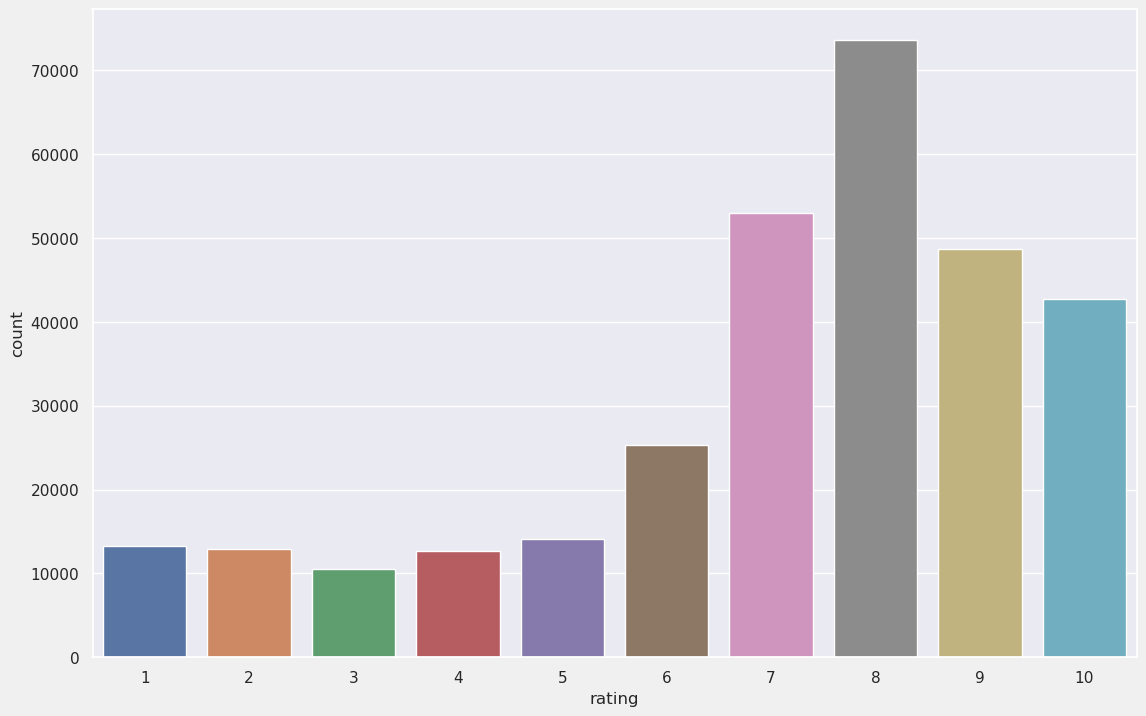

In [79]:
# 전체 rating 별 카운트
plt.figure(figsize=(12, 8))
sns.set_theme(style="darkgrid")
sns.countplot(data=ratings, x='rating', palette="deep")
plt.show()

## 2. 파일 merge

In [80]:
merge_ = ratings.merge(books, how='left', on='isbn')
data = merge_.merge(users, how='inner', on='user_id')
print('data shape:', data.shape)

data shape: (306795, 15)


In [81]:
ratings.shape

(306795, 3)

In [82]:
# isbn 잘 공유하고 있나 확인 
set(ratings['isbn']) - set(books['isbn'])

set()

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306795 entries, 0 to 306794
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              306795 non-null  int64  
 1   isbn                 306795 non-null  object 
 2   rating               306795 non-null  int64  
 3   book_title           306795 non-null  object 
 4   book_author          306795 non-null  object 
 5   year_of_publication  306795 non-null  float64
 6   publisher            306795 non-null  object 
 7   img_url              306795 non-null  object 
 8   language             187711 non-null  object 
 9   summary              187711 non-null  object 
 10  img_path             306795 non-null  object 
 11  category             305895 non-null  object 
 12  location             306795 non-null  object 
 13  age                  306795 non-null  float64
 14  age_range            306795 non-null  float64
dtypes: float64(3), in

### 2-1. age와 category

In [84]:
category_df = pd.DataFrame(data['category'].value_counts()).reset_index()
category_df.columns = ['category', 'count']
age_df = pd.DataFrame(data['age_range'].value_counts()).reset_index()
age_df.columns = ['age_range', 'count']

category_list = category_df[(category_df['count'] < 10000)]['category'].tolist()
age_list = age_df['age_range'].sort_values().tolist()

In [85]:
age_category_df = data[['age_range', 'category']].dropna()
age_category_df = age_category_df.groupby(['age_range', 'category']).size().unstack().fillna(0)
age_category_df

category,art_literature,computer_internat,cook_food,economy_business,fiction1,fiction2,game_leisure,history_culture,home_life,human psychology_self-development,nonfiction,other,religion_philosophy,science_nature,society_human relations
age_range,,,,,,,,,,,,,,,
0.0,10.0,1.0,8.0,2.0,516.0,13.0,6.0,1.0,10.0,23.0,60.0,2.0,2.0,17.0,11.0
10.0,470.0,91.0,97.0,182.0,17416.0,303.0,138.0,21.0,222.0,337.0,396.0,118.0,453.0,277.0,466.0
20.0,2447.0,444.0,670.0,816.0,70517.0,1015.0,673.0,41.0,996.0,1022.0,817.0,652.0,1883.0,1093.0,2527.0
30.0,2237.0,662.0,817.0,1020.0,73415.0,725.0,687.0,45.0,1357.0,1157.0,858.0,541.0,1995.0,997.0,2462.0
40.0,1377.0,285.0,594.0,679.0,46864.0,377.0,451.0,21.0,785.0,768.0,648.0,325.0,1474.0,824.0,1566.0
50.0,834.0,180.0,321.0,339.0,32376.0,204.0,283.0,20.0,438.0,446.0,366.0,166.0,839.0,457.0,891.0
60.0,266.0,34.0,88.0,128.0,9810.0,59.0,81.0,7.0,122.0,132.0,90.0,51.0,299.0,117.0,259.0
70.0,44.0,30.0,15.0,20.0,2150.0,13.0,19.0,1.0,26.0,27.0,20.0,13.0,49.0,41.0,36.0
80.0,5.0,0.0,0.0,3.0,253.0,2.0,4.0,0.0,2.0,5.0,0.0,2.0,8.0,7.0,5.0


<AxesSubplot:xlabel='category', ylabel='age_range'>

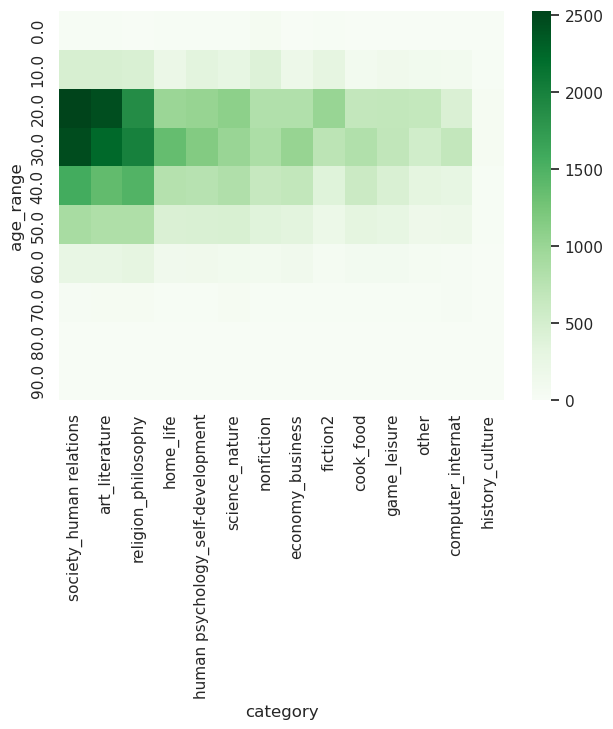

In [86]:
sns.heatmap(age_category_df.loc[age_list, category_list], cmap="Greens")

### 2-2. title 별 rating

In [87]:
# Top 30의 책 제목
popular_book_list = data['book_title'].value_counts().sort_values(ascending=False)[:30].index
popular_book = data[data['book_title'].isin(popular_book_list)]

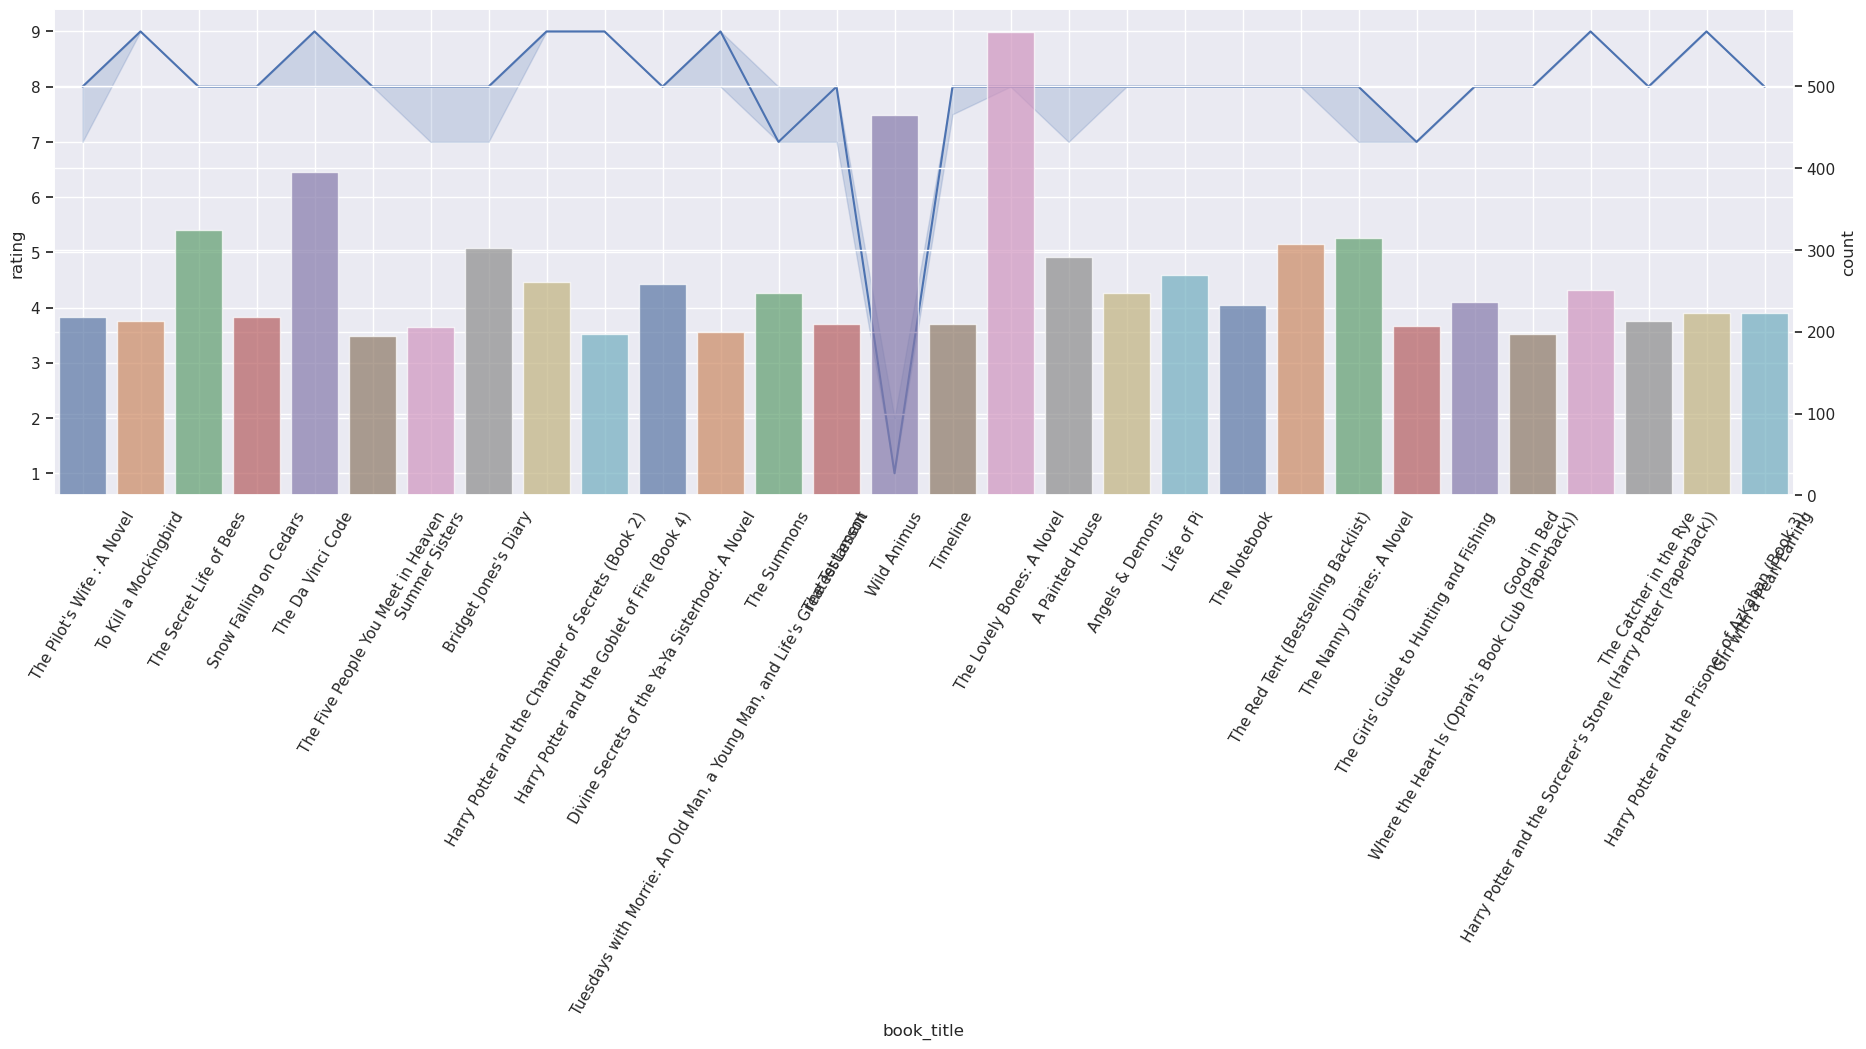

In [95]:
fig, ax1 = plt.subplots(figsize=(20, 6))
plt.xticks(rotation=60)
# 책 제목 별 rating
sns.lineplot(data=popular_book, x='book_title', y='rating', estimator=np.median, markers='o',ax=ax1)
ax2 = ax1.twinx()
# 책이 얼마나 평가되었는지 -> bar plot
sns.countplot(data=popular_book, x='book_title', alpha=0.7, palette='deep', ax=ax2)
plt.show()

In [98]:
# Top 30의 책 isbn
popular_book_list_isbn = data['isbn'].value_counts().sort_values(ascending=False)[:30].index
popular_book_isbn = data[data['isbn'].isin(popular_book_list_isbn)]

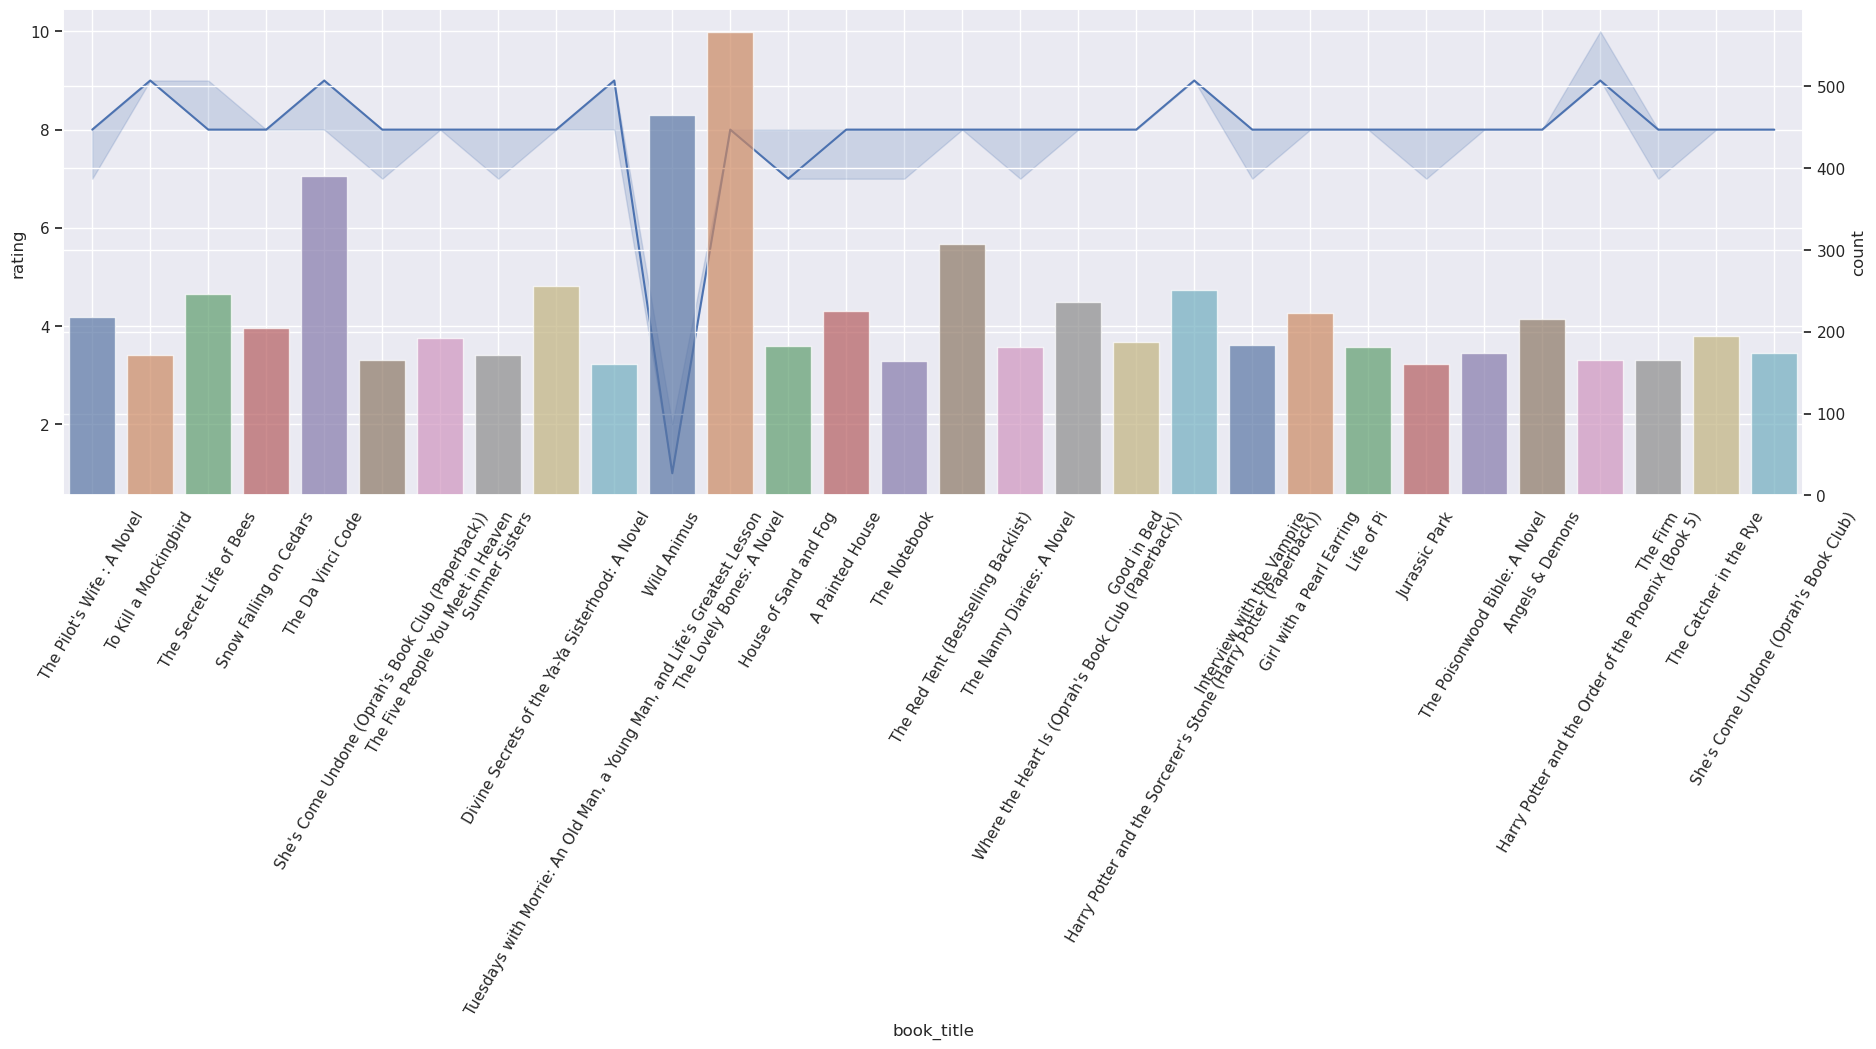

In [99]:
fig, ax1 = plt.subplots(figsize=(20, 6))
plt.xticks(rotation=60)
# 책 제목 별 rating
sns.lineplot(data=popular_book_isbn, x='book_title', y='rating', estimator=np.median, markers='o',ax=ax1)
ax2 = ax1.twinx()
# 책이 얼마나 평가되었는지 -> bar plot
sns.countplot(data=popular_book_isbn, x='book_title', alpha=0.7, palette='deep', ax=ax2)
plt.show()

### 2-3. category 별 rating

In [109]:
# 카테고리 별 Rating 차이 -> Top 10
popular_cate_list = data['category'].value_counts().sort_values(ascending=False)[:10].index
popular_cate = data[data['category'].isin(popular_cate_list)]

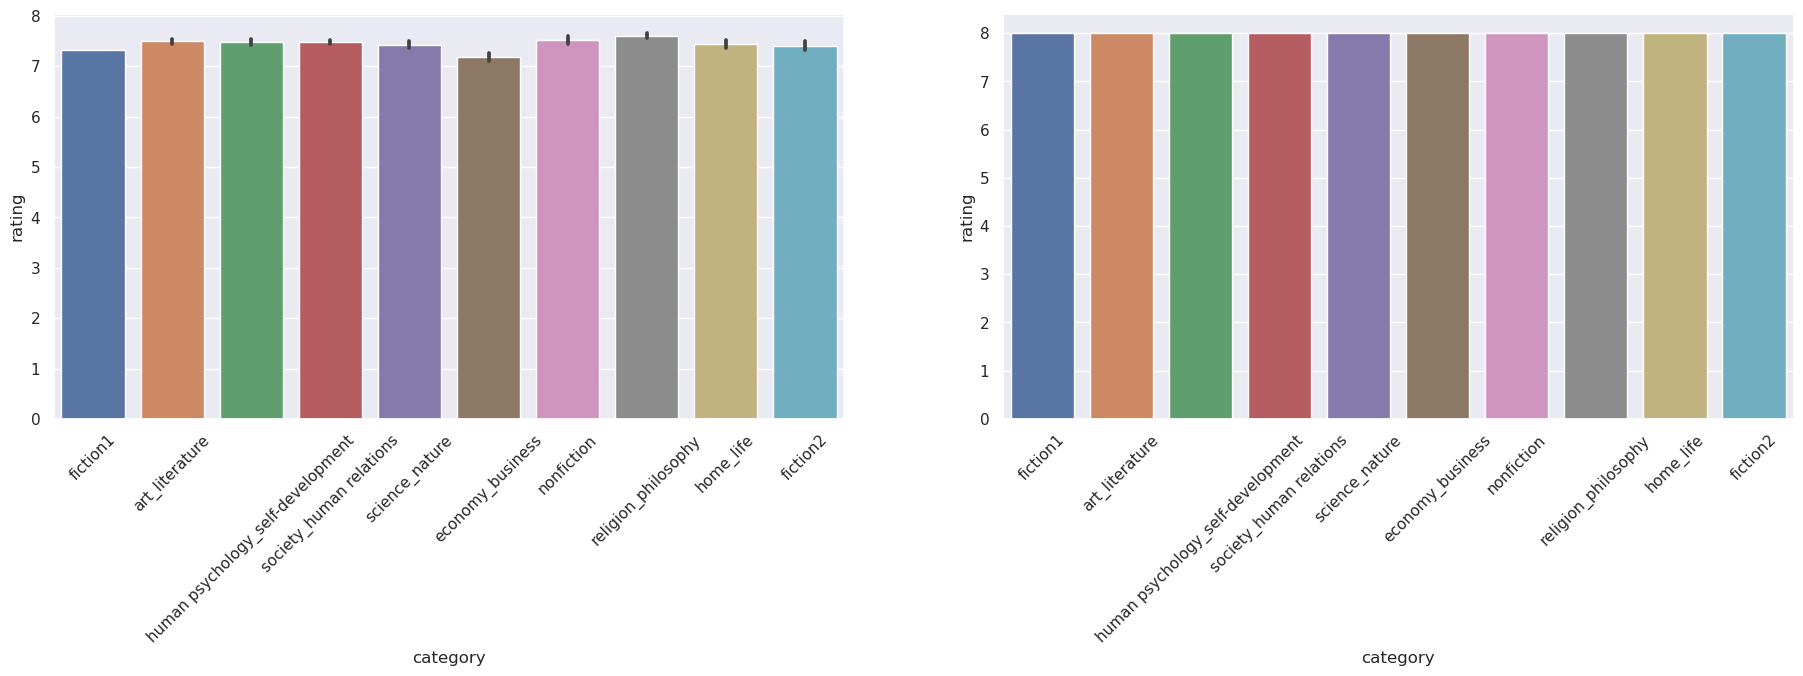

In [110]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))

plot1 = sns.barplot(data=popular_cate[popular_cate['rating']>1], x='category', y='rating', estimator=np.mean, ax=ax[0])
plot2 = sns.barplot(data=popular_cate[popular_cate['rating']>1], x='category', y='rating', estimator=np.median, ax=ax[1])
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45)
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=45)
plt.show()
